In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from mergetree import *
from utils import *
from matching import *

# Part 1: Stability Experiments

## Adding A Local Min

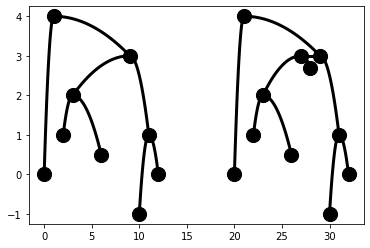

In [2]:
eps = 0.3
x1 = np.array([0, 4, 1, 2, 1, 1, 0.5, 3, 3, 3, -1, 1, 0])
x2 = np.array([0, 4, 1, 2, 1, 1, 0.5, 3, 3-eps, 3, -1, 1, 0])

MT1 = MergeTree()
MT1.init_from_timeseries(x1)
MT2 = MergeTree()
MT2.init_from_timeseries(x2)

MT1.plot(use_inorder=False)
MT2.plot(use_inorder=False, params={'offset':[20, 0]})

In [3]:
w1 = MT1.get_weight_sequence()
w2 = MT2.get_weight_sequence()

In [4]:
print(w1)
print(w2)
print(weight_sequence_distance(w1, w2))

[4.  3.  1.5 4.  1. ]
[4.  3.  1.5 0.3 4.  1. ]
(0.2999999999999998, [[0, 0], [1, 1], [4, 5]])


## Adding Noise

In [5]:
np.random.seed(0)
x3 = x1 + np.round(100*np.random.randn(x1.size))/100
MT3 = MergeTree()
MT3.init_from_timeseries(x3)
w3 = MT3.get_weight_sequence()
print(w1, "\n\n")
print(w3, "\n\n")
print(np.cumsum(np.abs(w1-w3)))
print(weight_sequence_distance(w1, w3))
#print(weight_sequence_distance(w2, w3))

[4.  3.  1.5 4.  1. ] 


[2.64 2.42 4.22 4.27 1.69] 


[1.36 1.94 4.66 4.93 5.62]
(1.740000000000002, [[0, 0], [0, 1], [4, 4]])


## Epsilon Rotation

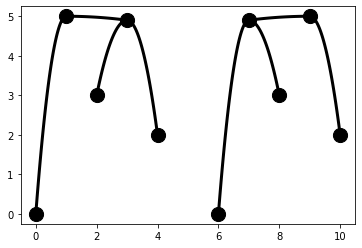

In [6]:
eps = 0.1
x1 = [5, 0, 5, 3, 5-eps, 2]
x2 = [5, 0, 5-eps, 3, 5, 2]

MT1 = MergeTree()
I1 = MT1.init_from_timeseries(x1)
MT2 = MergeTree()
I2 = MT2.init_from_timeseries(x2)

MT1.plot(True)
MT2.plot(True, params={'offset':np.array([6, 0])})

In [7]:
w1 = MT1.get_weight_sequence()
w2 = MT2.get_weight_sequence()
print(weight_sequence_distance(w1, w2))

(0.0, [[0, 0], [2, 2]])
